# Clasificación

Para el data set de 413 filas

In [1]:
# Importing the libraries 
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
%matplotlib inline

In [2]:
df=pd.read_csv('birds_without_nn.csv')
df.head()

,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type
0,80.78,6.68,72.01,4.88,41.81,3.70,5.50,4.03,38.70,3.84,3
1,88.91,6.63,80.53,5.59,47.04,4.30,80.22,4.51,41.50,4.01,3
2,79.97,6.37,69.26,5.28,43.07,3.90,75.35,4.04,38.31,3.34,3
3,77.65,5.70,65.76,4.77,40.04,3.52,69.17,3.40,35.78,3.41,3
4,62.80,4.84,52.09,3.73,33.95,2.72,56.27,2.96,31.88,3.13,3


In [3]:
target=df['type']
dn=df.drop('type',axis=1)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dn, target, test_size = 0.25, random_state = 0)

In [5]:
X_test.shape,X_train.shape

((104, 10), (309, 10))

In [6]:
#Escalamos las variables como en la seleccion de caracteristicas
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)

# LogisticRegression

Parecido a LinearRegression

La regresión logística es una técnica de clasificación fundamental. Pertenece al grupo de clasificadores lineales y es algo similar a la regresión polinómica y lineal . La regresión logística es rápida y relativamente sencilla, y le conviene interpretar los resultados. Aunque es esencialmente un método para la clasificación binaria, también se puede aplicar a problemas multiclase.

In [7]:
#Logistic Regression 
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
model_score_train = model.score(X_train, y_train)
print("Training score: ",model_score_train)
model_score_test = model.score(X_test, y_test)
print("Testing score: ",model_score_test)

Training score:  0.7249190938511327
Testing score:  0.6923076923076923


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [8]:
from sklearn import metrics
y_pred = model.predict(X_test)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.6923076923076923


# Matriz de confusión

En resumen, la diagonal principal indica el numero de aciertos que obtuvo nuestro modelo por cada clase. El resto de los valores en la matriz son los errores

https://pochocosta.com/podcast/haciendo-la-matriz-de-confusion-un-poco-menos-confusa/


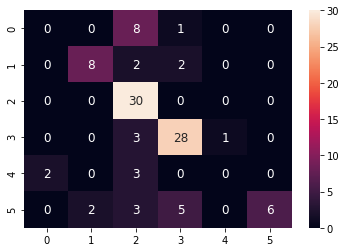

In [9]:
from sklearn.metrics import confusion_matrix 
import seaborn as sn
cm = pd.DataFrame(confusion_matrix(y_test, y_pred))
sn.heatmap(cm, annot=True, annot_kws={"size": 12}) # font size

# DecisionTreeClassifier

In [10]:
#https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_score_train = dt.score(X_train, y_train)
print("Training score: ",dt_score_train)
dt_score_test = dt.score(X_test, y_test)
print("Testing score: ",dt_score_test)

Training score:  1.0
Testing score:  0.75


In [11]:
y_pred =dt.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.75


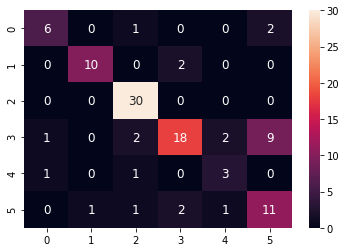

In [12]:
cm = pd.DataFrame(confusion_matrix(y_test, y_pred))
sn.heatmap(cm, annot=True, annot_kws={"size": 12}) # font size

# RandomForestClassifier

In [13]:
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_score_train = rf.score(X_train, y_train)
print("Training score: ",rf_score_train)
rf_score_test = dt.score(X_test, y_test)
print("Testing score: ",rf_score_test)

Training score:  0.9902912621359223
Testing score:  0.75


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [14]:
y_pred =rf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8076923076923077


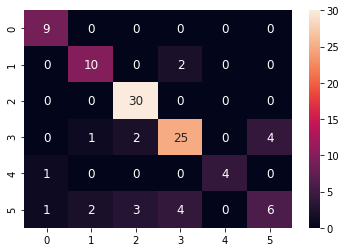

In [15]:
cm = pd.DataFrame(confusion_matrix(y_test, y_pred))
sn.heatmap(cm, annot=True, annot_kws={"size": 12}) # font size

# KNeighborsClassifier

In [16]:
#https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_score_train = knn.score(X_train, y_train)
print("Training score: ",knn_score_train)
knn_score_test = knn.score(X_test, y_test)
print("Testing score: ",knn_score_test)

Training score:  0.8284789644012945
Testing score:  0.8269230769230769


In [17]:
y_pred=knn.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8269230769230769


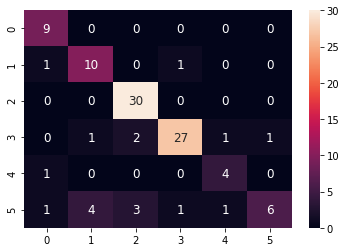

In [18]:
cm = pd.DataFrame(confusion_matrix(y_test, y_pred))
sn.heatmap(cm, annot=True, annot_kws={"size": 12})

In [20]:
models = pd.DataFrame({
        'Model'          : ['Logistic Regression', 'kNN', 'Decision Tree', 'Random Forest'],
        'Training_Score' : [model_score_train, knn_score_train, dt_score_train, rf_score_train],
        'Testing_Score'  : [model_score_test, knn_score_test, dt_score_test, rf_score_test]
    })
models.sort_values(by='Testing_Score', ascending=False)

,Model,Training_Score,Testing_Score
1,kNN,0.828479,0.826923
2,Decision Tree,1.000000,0.750000
3,Random Forest,0.990291,0.750000
0,Logistic Regression,0.724919,0.692308


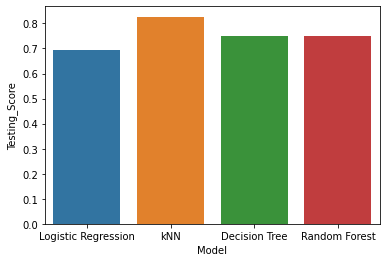

In [21]:
import seaborn as sns
sns.barplot(x='Model',y='Testing_Score',data=models)